# <center>**GOOGLE PLAY STORE APPS: ANALYSIS & RATING PREDICTION**</center>


In [1]:
#%run /Users/shabnanasser/workplace/git/Capstone_3/Cap3_Preprocessing.ipynb

# Modeling

In the Data Modeling section, we are going to train our standardised data with three different ML models: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGB Regressor, SVR, MLP Regressor. Also, we will check the Mean Squared Error (MSE), Mean Absolute Error (MAE), Median Absolute Error (MedAE), R-squared (R2) of each model and find the best performing model among them.

# 1) Linear Regression

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Perform cross-validation
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression:")
print(f"  Cross-Validation Mean Squared Error (MSE): {-linear_cv_scores.mean()}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")



Linear Regression:
  Cross-Validation Mean Squared Error (MSE): 0.05537877199326555
  Mean Squared Error (MSE): 0.04266302690066463
  Mean Absolute Error (MAE): 0.16491611600022119
  Median Absolute Error (MedAE): 0.12249562575942749
  R-squared (R2): 0.8958245693957043


# 2) Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Define parameter grids for Random Forest Regressor 
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV for Random Forest Regressor
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=tscv, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Print best parameters found for Random Forest Regressor
print("Random Forest Regressor Best parameters:", rf_grid_search.best_params_)

# Train Random Forest Regressor with best parameters
best_rf_model = rf_grid_search.best_estimator_

# Make predictions with Random Forest Regressor
rf_predictions = best_rf_model.predict(X_test)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Regressor MSE:", rf_mse)
mae = mean_absolute_error(y_test, rf_predictions)
medae = median_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")



Random Forest Regressor Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Regressor MSE: 0.20084729003870253
  Mean Absolute Error (MAE): 0.41016648041479853
  Median Absolute Error (MedAE): 0.48287480517061543
  R-squared (R2): 0.5095670784399559


# 3) Gradient Boosting Regressor

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
# Perform GridSearchCV for Gradient Boosting Regressor
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=tscv, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Print best parameters found for Gradient Boosting Regressor
print("Gradient Boosting Regressor Best parameters:", gb_grid_search.best_params_)

# Train Gradient Boosting Regressor with best parameters
best_gb_model = gb_grid_search.best_estimator_

# Make predictions with Gradient Boosting Regressor
gb_predictions = best_gb_model.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Regressor MSE:", gb_mse)
mae = mean_absolute_error(y_test, gb_predictions)
medae = median_absolute_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")



Gradient Boosting Regressor Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Regressor MSE: 0.17251675994636878
  Mean Absolute Error (MAE): 0.39085206834342956
  Median Absolute Error (MedAE): 0.418306305122897
  R-squared (R2): 0.5787451322730477


# 4) XGB Regressor

In [5]:
from xgboost import XGBRegressor

# Define parameter grid for XGBoost Regressor
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV for XGBoost Regressor
xgb_grid_search = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# Print best parameters found for XGBoost Regressor
print("XGBoost Regressor Best parameters:", xgb_grid_search.best_params_)

# Train XGBoost Regressor with best parameters
best_xgb_model = xgb_grid_search.best_estimator_

# Make predictions with XGBoost Regressor
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate XGBoost Regressor
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost Regressor MSE:", xgb_mse)

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_predictions)
medae = median_absolute_error(y_test, xgb_predictions)
r2 = r2_score(y_test, xgb_predictions)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")


XGBoost Regressor Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Regressor MSE: 0.11467848936809036
  Mean Absolute Error (MAE): 0.25091174192292354
  Median Absolute Error (MedAE): 0.17688411561940764
  R-squared (R2): 0.7199757757744834


# 5) SVR

In [6]:
from sklearn.svm import SVR

# Define parameter grid for SVR
svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for SVR
svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train, y_train)

# Print best parameters found for SVR
print("SVR Best parameters:", svr_grid_search.best_params_)

# Train SVR with best parameters
best_svr_model = svr_grid_search.best_estimator_

# Make predictions with SVR
svr_predictions = best_svr_model.predict(X_test)

# Evaluate SVR
svr_mse = mean_squared_error(y_test, svr_predictions)
print("SVR MSE:", svr_mse)

# Evaluate the model
mae = mean_absolute_error(y_test, svr_predictions)
medae = median_absolute_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")

SVR Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVR MSE: 0.06678059204087228
  Mean Absolute Error (MAE): 0.2090695772864192
  Median Absolute Error (MedAE): 0.21578289922077226
  R-squared (R2): 0.8369338174699626


# 6) MLP Regressor

In [7]:
from sklearn.neural_network import MLPRegressor

# Define parameter grid for MLP Regressor
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform GridSearchCV for MLP Regressor
mlp_grid_search = GridSearchCV(MLPRegressor(), mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train, y_train)

# Print best parameters found for MLP Regressor
print("MLP Regressor Best parameters:", mlp_grid_search.best_params_)

# Train MLP Regressor with best parameters
best_mlp_model = mlp_grid_search.best_estimator_

# Make predictions with MLP Regressor
mlp_predictions = best_mlp_model.predict(X_test)

# Evaluate MLP Regressor
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print("MLP Regressor MSE:", mlp_mse)

# Evaluate the model
mae = mean_absolute_error(y_test, mlp_predictions)
medae = median_absolute_error(y_test, mlp_predictions)
r2 = r2_score(y_test, mlp_predictions)
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Median Absolute Error (MedAE): {medae}")
print(f"  R-squared (R2): {r2}")


MLP Regressor Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'solver': 'lbfgs'}
MLP Regressor MSE: 0.058447092989241424
  Mean Absolute Error (MAE): 0.18766570995764703
  Median Absolute Error (MedAE): 0.16606513580288695
  R-squared (R2): 0.85728272178389


The linear regression model provides insights into the relationship between input features and app ratings, which performs best out of all other models used with a higher R-squared (R2): 0.895 and all other metric values are lower. Now, we can analyze feature importance and identify the features that have the most significant impact on app ratings, thereby informing decision-making and potentially improving app performance and user satisfaction.

## Linear Regression: Feature importance

In [8]:
# Get the coefficients of the linear regression model
coefficients = linear_model.coef_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients in descending order
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df_sorted = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Get the top 10 important features
top_10_features = coefficients_df_sorted.head(10)

# Print or visualize the top 10 important features
#print(top_10_features)


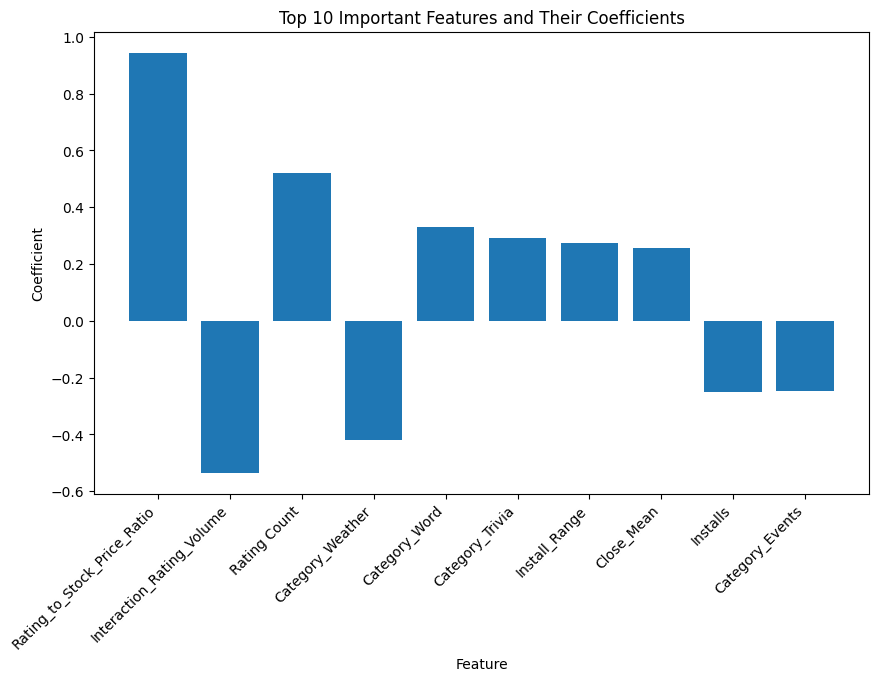

In [9]:
import matplotlib.pyplot as plt

# Plotting the top 10 important features and their coefficients
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 10 Important Features and Their Coefficients')
plt.xticks(rotation=45, ha='right')  
plt.show()


The coefficients obtained from the linear regression model indicate the strength and direction of the relationship between each feature and the target variable (the app's rating). Here's how we can interpret the coefficients of the top 10 important features:

* **Rating_to_Stock_Price_Ratio:** This feature represents the ratio of the app's rating to its stock price. A higher ratio indicates that the app is perceived positively relative to its market value. Apps with a higher ratio are likely to have higher ratings because investors and users perceive them as valuable and desirable.
* **Interaction_Rating_Volume:** This feature has a negative coefficient, indicating a negative relationship with the app's rating. Higher interaction rating volumes may correspond to lower ratings.
* **Rating Count:** This feature has a positive coefficient, suggesting a positive relationship with the app's rating. Apps with more rating counts tend to have higher ratings.
* **Category_Weather:** This categorical feature has a negative coefficient, indicating that apps categorized as "Weather" tend to have lower ratings compared to other categories.
* **Category_Word:** This categorical feature has a positive coefficient, suggesting that apps categorized as "Word" tend to have higher ratings compared to other categories.
* **Category_Trivia:** This categorical feature has a positive coefficient, indicating that apps categorized as "Trivia" tend to have higher ratings compared to other categories.
* **Install_Range:** This feature has a positive coefficient, suggesting a positive relationship with the app's rating. A wider install range may correspond to higher ratings.
* **Close_Mean:** This feature has a positive coefficient, indicating a positive relationship with the app's rating. Higher average closing stock prices may correspond to higher ratings.
* **Installs:** This feature has a negative coefficient, suggesting a negative relationship with the app's rating. Apps with higher installation numbers may have lower ratings.
* **Category_Events:** This categorical feature has a negative coefficient, indicating that apps categorized as "Events" tend to have lower ratings compared to other categories.

# SUMMARY


The linear regression model, Random Forest Regressor, Gradient Boosting Regressor, XGB Regressor, SVR, MLP Regressor is trained and evaluated on the dataset. Evaluation metrics such as MSE, MAE, MedAE, and R2 are used to assess the model's performance. Found that Linear Regression model performs best with an R-squared (R2): 0.895. Feature importance analysis helps identify the key features that contribute to predicting app ratings. The feature importance plot provides a visual representation of the most important features and their coefficients.